# Корреляционный анализ. Проверка статистических гипотез

## Задействованные инструменты:

- Бблиотеки Pandas, matplotlib, scipy
- Статистический анализ

heart.csv - данные о сердечных заболеваниях.
Признаки (переменные):  
- age  
- sex (1 - Male, 0 - Female)  
- cp - chest pain type (4 values)  
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 0 = normal; 1 = fixed defect; 2 = reversable defect


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scist


#Выгрузим данные в таблицу
df = pd.read_table('/Users/user/Projects/SP/heart.csv', delimiter = ',', index_col=None)

print (df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

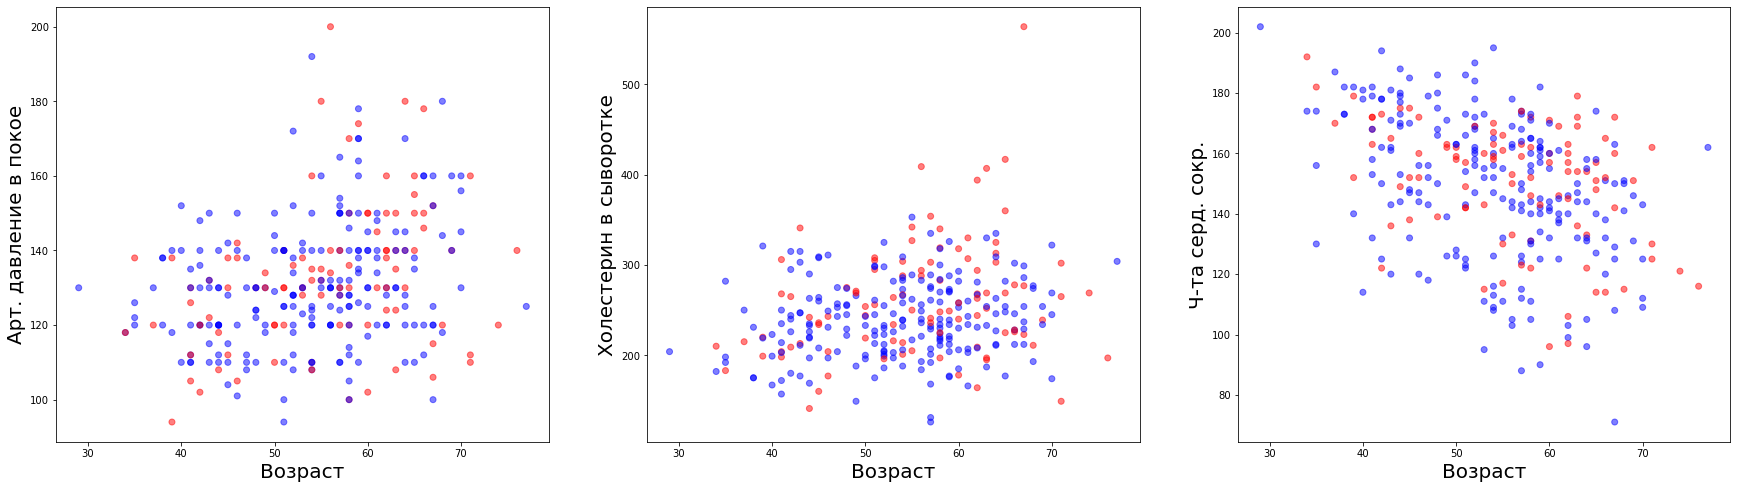

In [15]:
#Построим следующие парные диаграммы рассеяния:

##trestbps - age
##chol - age
##thalach - age

# точки на диаграммах отобразим разными цветами в зависимости от пола.

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (30, 8))
cols = {0: 'red', 1: 'blue'}

ax1.scatter(df['age'], df['trestbps'], c = df.sex.map(cols), alpha=0.5)
ax1.set_xlabel ('Возраст', fontsize = 20)
ax1.set_ylabel ('Арт. давление в покое', fontsize = 20)

ax2.scatter(df['age'], df['chol'], c = df.sex.map(cols), alpha=0.5)
ax2.set_xlabel ('Возраст', fontsize = 20)
ax2.set_ylabel ('Холестерин в сыворотке', fontsize = 20)

ax3.scatter(df['age'], df['thalach'], c = df.sex.map(cols), alpha=0.5)
ax3.set_xlabel ('Возраст', fontsize = 20)
ax3.set_ylabel ('Ч-та серд. сокр.', fontsize = 20)

plt.show()

**Вывод:** Исходя из полученных диаграмм рассеяния мы можем высказать предположение, что артериальное давление с возрастом возрастает (положительная корреляция). Показатели концентрации холестирина в сыворотке крови с возрастом визуально коррелируют незначительно (как-будто не меняется). А частота сердечных сокращений с возрастом наоборот уменьшается (отрицательная корреляция).

In [16]:
#Проверим наши предположения, вычислив коэффициенты корреляции Спирмена. Сделайте выводы.

print(scist.spearmanr(df['age'],  df['trestbps']))
print(scist.spearmanr(df['age'], df['chol']))
print(scist.spearmanr(df['age'], df['thalach']))

SpearmanrResult(correlation=0.28561681085475227, pvalue=4.2617094650124673e-07)
SpearmanrResult(correlation=0.19578599445342354, pvalue=0.0006099143222853829)
SpearmanrResult(correlation=-0.3980524371044455, pvalue=6.024320734620579e-13)


**Заключение:** В результате вычисления коэффициента Спирмана, предположения для зависимостей артериального давления от взраста и частоты сердечных сокращений от возраста подвердились.

Для зависимости холестирина от возраста тест Спирмана показал, что корреляция положительная и pvalue < 0,05. Это значит, что данные признаки также показывают взаимозависимость.

In [17]:
# Проверим признаки age, trestbps, chol, thalach, oldpeak на нормальность с помощью критерия Шапиро-Уилка. Сделайте выводы.
#Для проверки гипотез используем уровень значимости 0.05.

print(scist.shapiro(df['age']))
print(scist.shapiro(df['trestbps']))
print(scist.shapiro(df['chol']))
print(scist.shapiro(df['thalach']))
print(scist.shapiro(df['oldpeak']))

ShapiroResult(statistic=0.9863715767860413, pvalue=0.005801409482955933)
ShapiroResult(statistic=0.965917706489563, pvalue=1.4580031120203785e-06)
ShapiroResult(statistic=0.9468814134597778, pvalue=5.364669153351542e-09)
ShapiroResult(statistic=0.9763151407241821, pvalue=6.620329077122733e-05)
ShapiroResult(statistic=0.8441833853721619, pvalue=8.18340235561653e-17)


__Вывод:__ Все рассмотренные признаки, кроме возраста (pvalu (age) > alpha, alpha=0,05) не подчиняются нормальному распределению.